In [41]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
#nltk.download("wordnet")
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('omw-1.4')

In [29]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
#!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

In [30]:
df = pd.read_csv('bbc_text_cls.csv')

In [31]:
df

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech


In [32]:
pd.unique(df["labels"])

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [33]:
len(df)

2225

In [34]:
inputs = df['text']
labels = df['labels']

(array([510.,   0., 386.,   0.,   0., 417.,   0., 511.,   0., 401.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

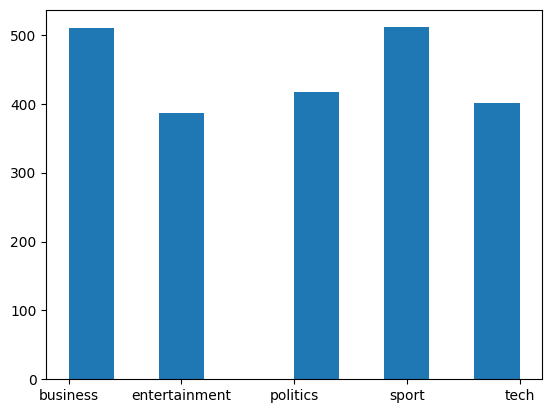

In [42]:
plt.hist(labels)

In [43]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels)

In [44]:
vectorizer = CountVectorizer()

In [45]:
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

In [48]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print(model.score(Xtrain, Ytrain))
print(model.score(Xtest, Ytest))

0.9946043165467626
0.9730700179533214


In [49]:
vectorizer = CountVectorizer(stop_words = "english")
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print(model.score(Xtrain, Ytrain))
print(model.score(Xtest, Ytest))

0.9940047961630696
0.9730700179533214


In [50]:
def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [51]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in words_and_tags]

In [52]:
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

E:\Programowanie\Machine Learning Natural Language Processing in Python (V2)\Vector models and text preprocessing methods\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9940047961630696
test score: 0.9712746858168761


In [53]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [54]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

E:\Programowanie\Machine Learning Natural Language Processing in Python (V2)\Vector models and text preprocessing methods\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9928057553956835
test score: 0.9748653500897666


In [61]:
def simple_tokenizer(s):
    return s.split()

In [62]:
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))

E:\Programowanie\Machine Learning Natural Language Processing in Python (V2)\Vector models and text preprocessing methods\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9970023980815348
test score: 0.9694793536804309
